## Observations and Insights 

In [222]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
c_data = pd.merge(mouse_metadata,study_results, on='Mouse ID')
# Display the data table for preview
c_data1 = c_data
c_data2 = c_data
c_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [202]:
# Checking the number of mice.
num_mice = len(c_data.index)
num_mice

1893

In [203]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [204]:
# Optional: Get all the data for the duplicate mouse ID. 



In [205]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicates.drop_duplicates(subset='Mouse ID', keep = 'first', inplace = True)
clean_data = duplicates
c_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [224]:
# Checking the number of mice in the clean DataFrame.
mice = len(clean_data['Mouse ID'].value_counts())
mice

249

## Summary Statistics

In [225]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

clean_data.groupby(by = 'Mouse ID')
mean = clean_data.mean()
med = clean_data.median()
var = clean_data.var()
std_dev = clean_data.std()
SEM = c_data['Tumor Volume (mm3)'].sem()

data = {'Statistical Analysis': ['Mean', 'Median', 'Variance', 'Std Deviation', 'SEM'],
    'Age_months': [mean[0], med[0], var[0], std_dev[0],0],
       'Weight (g)': [mean[1], med[1], var[1], std_dev[1],0],
       'Timepoint': [mean[2], med[2], var[2], std_dev[2],0],
       'Tumor Volume (mm3)':[mean[3], med[3], var[3], std_dev[3],0],
       'Metastaitc Sites':[0,0,0,0,SEM]}

summary_df = pd.DataFrame(data)
summary_df

,Statistical Analysis,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastaitc Sites
0,Mean,12.730924,26.116466,0.0,45.0,0.000000
1,Median,13.000000,27.000000,0.0,45.0,0.000000
2,Variance,52.253919,13.667833,0.0,0.0,0.000000
3,Std Deviation,7.228687,3.697003,0.0,0.0,0.000000
4,SEM,0.000000,0.000000,0.0,0.0,0.204436


In [226]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_data.groupby(by = 'Drug Regimen')
sum_df = clean_data.agg(['mean','median','var','std'])

# Using the aggregation method, produce the same summary statistics in a single line
sum_df

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
mean,12.730924,26.116466,0.0,45.0,0.0
median,13.000000,27.000000,0.0,45.0,0.0
var,52.253919,13.667833,0.0,0.0,0.0
std,7.228687,3.697003,0.0,0.0,0.0


## Bar and Pie Charts

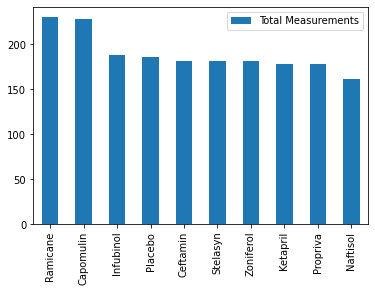

In [227]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_reg = c_data['Drug Regimen'].value_counts()

df = pd.DataFrame({'Drug Regimen': ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
                  'Total Measurements': [drug_reg[0],drug_reg[1],drug_reg[2],drug_reg[3],drug_reg[4],
               drug_reg[5],drug_reg[6],drug_reg[7],drug_reg[8],drug_reg[9]]},
                 index=['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
                       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'])


bar_meas = df.plot.bar()

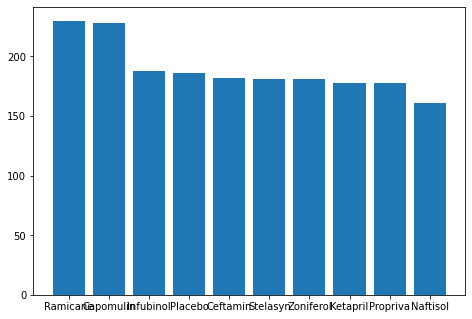

In [228]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
fig = plt.figure()
axis = fig.add_axes([0,0,1,1])
label = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
measurements = [drug_reg[0],drug_reg[1],drug_reg[2],drug_reg[3],drug_reg[4],
               drug_reg[5],drug_reg[6],drug_reg[7],drug_reg[8],drug_reg[9]]

axis.bar(label,measurements)
plt.show()


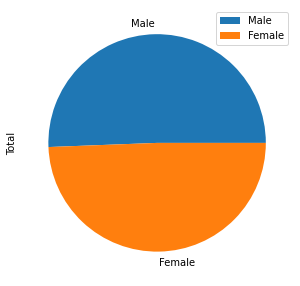

In [229]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_split = c_data['Sex'].value_counts()
male = gender_split[0]
female = gender_split[1]

df_pie = pd.DataFrame({'Total': [male, female],},
                  index=['Male', 'Female',])

plot = df_pie.plot.pie(y='Total', figsize=(5,5))

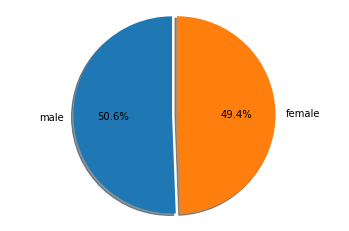

In [230]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'male','female'
sizes = [male, female]
explode = (0.05, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()


## Quartiles, Outliers and Boxplots

In [231]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
c_data2.drop_duplicates(subset='Mouse ID', keep = 'last', inplace = True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [232]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

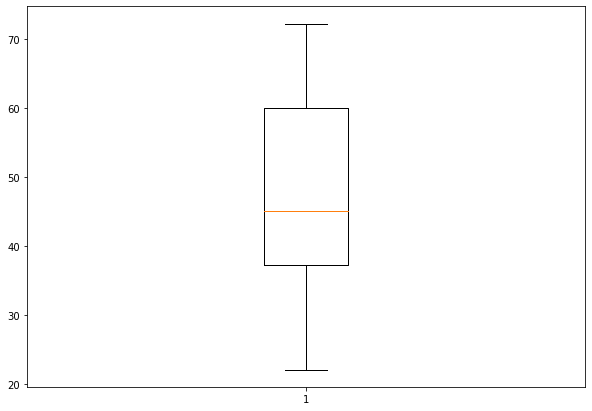

In [233]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_df = c_data2.loc[(c_data2['Drug Regimen'] == 'Capomulin') | 
                     (c_data2['Drug Regimen'] == 'Ramicane') | 
                     (c_data2['Drug Regimen'] == 'Infubinol') | 
                     (c_data2['Drug Regimen'] == 'Ceftamin')]

series = box_df['Tumor Volume (mm3)'[0:99]]
box = plt.figure(figsize =(10,7))
plt.boxplot(series)
plt.show()

## Line and Scatter Plots

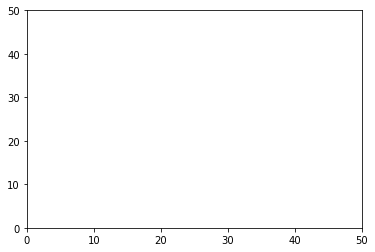

In [255]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# c_data2.loc[(c_data2['Drug Regimen'] == 'Capomulin')]
line_df = c_data1.loc[(c_data2['Drug Regimen'] == 'Capomulin')]
line_df.sort_values(by=['Timepoint'])
x_vals = line_df['Tumor Volume (mm3)'[0:99]]
y_vals = line_df['Timepoint'[0:99]]
plt.plot([x_vals],[y_vals])
plt.axis([0, 50, 0, 50])
plt.show()


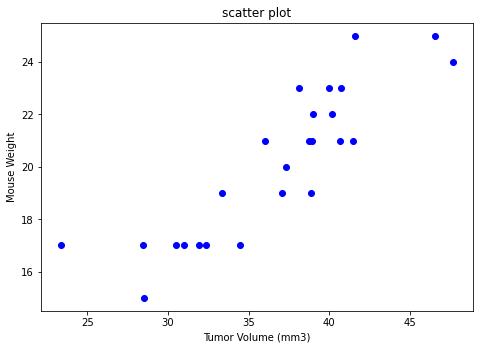

In [241]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scat_df = c_data2.loc[(c_data2['Drug Regimen'] == 'Capomulin')]
x_val = scat_df['Tumor Volume (mm3)'[0:99]]
y_val = scat_df['Weight (g)'[0:99]]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(x_val, y_val, color='b')
ax.set_xlabel('Tumor Volume (mm3)')
ax.set_ylabel('Mouse Weight')
ax.set_title('scatter plot')
plt.show()

## Correlation and Regression

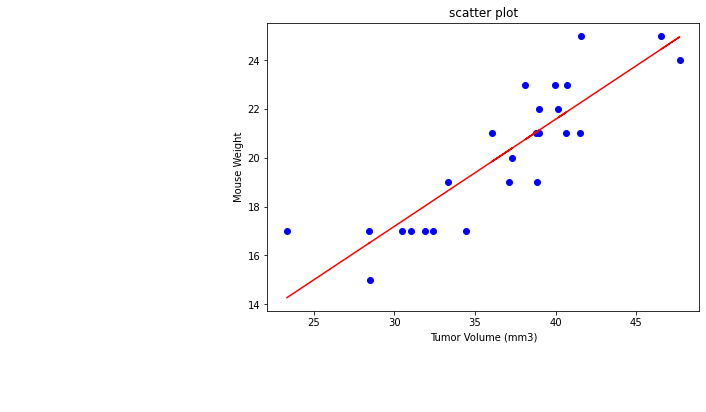

In [248]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
column1 = scat_df['Tumor Volume (mm3)']
column2 = scat_df['Weight (g)']
corr_co = column1.corr(column2)
corr_co #Correlation coefficient

# replotting scatter plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(x_val, y_val, color='b')
ax.set_xlabel('Tumor Volume (mm3)')
ax.set_ylabel('Mouse Weight')
ax.set_title('scatter plot')
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()